# Loan Default Prediction 3 - Feature Engineering 

#### We are visiting feature engieering step after our inital modeling (Refer to model notebook). 

During our first modeling stage using Logistic Regression and Gradient Boosting, we had difficulty distinguishing between defaults and non-defaults. This issue was resolved by applying class weights to handle the class imbalance.

## Feature Engineering focus:
#### Address Feature Skewness
- Skewed numerical features can impact model performance. Apply transformations like log to reduce the skew.

#### Interaction Features
- Create features that combine existing ones to capture meaningful relationships.

#### May Consider Binning
- Group continuous features into categories for better interpretability and modeling.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
df = pd.read_csv("../data/data_for_model.csv", index_col=0)

df.head()

,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,...,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,cb_person_default_on_file_Y
person_income,,,,,,,,,,,,,,,,,,,,,
9600,5.0,1000,11.14,0,0.10,2,True,False,False,False,...,True,False,False,False,False,False,False,True,False,False
9600,1.0,5500,12.87,1,0.57,3,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
65500,4.0,35000,15.23,1,0.53,2,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
54400,8.0,35000,14.27,1,0.55,4,False,False,True,False,...,False,True,False,False,False,False,False,False,True,True
9900,2.0,2500,7.14,1,0.25,2,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [9]:
df = df.reset_index()
df.head()

,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,...,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,cb_person_default_on_file_Y
0,9600,5.0,1000,11.14,0,0.10,2,True,False,False,...,True,False,False,False,False,False,False,True,False,False
1,9600,1.0,5500,12.87,1,0.57,3,False,False,True,...,False,True,False,False,False,False,False,False,False,False
2,65500,4.0,35000,15.23,1,0.53,2,False,False,True,...,False,True,False,False,False,False,False,False,True,False
3,54400,8.0,35000,14.27,1,0.55,4,False,False,True,...,False,True,False,False,False,False,False,False,True,True
4,9900,2.0,2500,7.14,1,0.25,2,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29459 entries, 0 to 29458
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_income                29459 non-null  int64  
 1   person_emp_length            29459 non-null  float64
 2   loan_amnt                    29459 non-null  int64  
 3   loan_int_rate                29459 non-null  float64
 4   loan_status                  29459 non-null  int64  
 5   loan_percent_income          29459 non-null  float64
 6   cb_person_cred_hist_length   29459 non-null  int64  
 7   loan_intent_EDUCATION        29459 non-null  bool   
 8   loan_intent_HOMEIMPROVEMENT  29459 non-null  bool   
 9   loan_intent_MEDICAL          29459 non-null  bool   
 10  loan_intent_PERSONAL         29459 non-null  bool   
 11  loan_intent_VENTURE          29459 non-null  bool   
 12  loan_grade_B                 29459 non-null  bool   
 13  loan_grade_C    

In [11]:
missing = df.isnull().sum()
print(missing)

person_income                  0
person_emp_length              0
loan_amnt                      0
loan_int_rate                  0
loan_status                    0
loan_percent_income            0
cb_person_cred_hist_length     0
loan_intent_EDUCATION          0
loan_intent_HOMEIMPROVEMENT    0
loan_intent_MEDICAL            0
loan_intent_PERSONAL           0
loan_intent_VENTURE            0
loan_grade_B                   0
loan_grade_C                   0
loan_grade_D                   0
loan_grade_E                   0
loan_grade_F                   0
loan_grade_G                   0
person_home_ownership_OTHER    0
person_home_ownership_OWN      0
person_home_ownership_RENT     0
cb_person_default_on_file_Y    0
dtype: int64


## Feature Skewness 

### Steps to Identify Skewed Features

#### 1. Visualize Distributions
We will use histograms/density plots to visually inspect the shape of each numerical feature.

A feature is likely skewed if it has a long tail to the right (positive skew), or if it has a long tail to the left (negative skew).

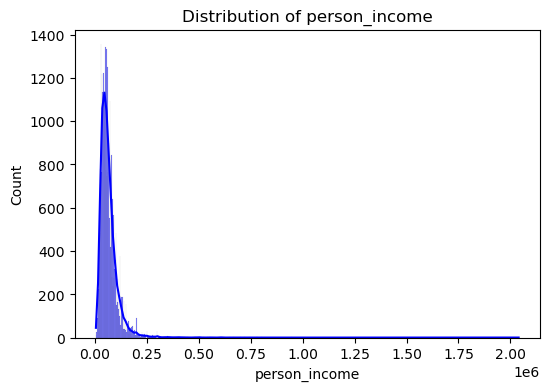

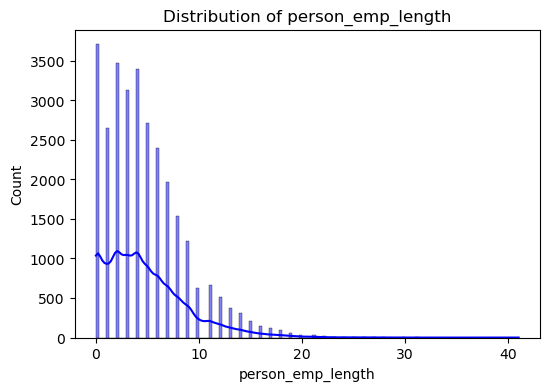

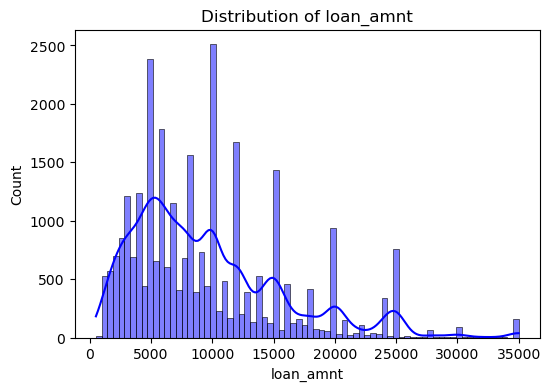

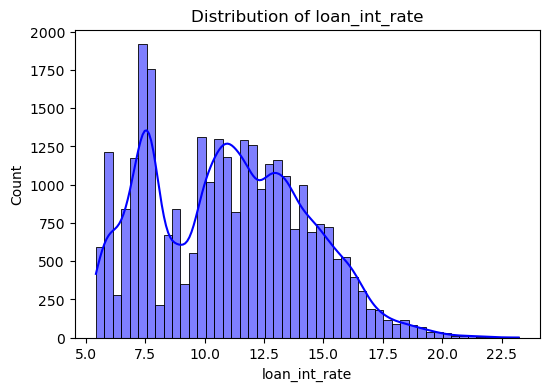

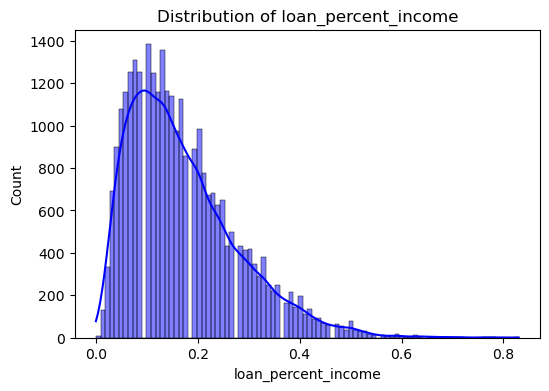

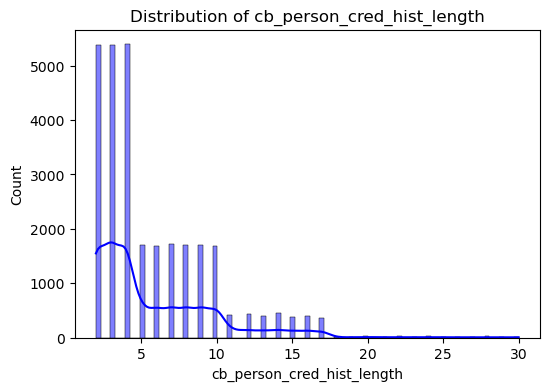

In [12]:
numerical_columns = ['person_income', 'person_emp_length', 'loan_amnt', 
                     'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.show()

In [13]:
skewness = df[numerical_columns].skew()
print("Skewness of Numerical Features:")
print(skewness)

Skewness of Numerical Features:
person_income                 8.995906
person_emp_length             1.286900
loan_amnt                     1.184072
loan_int_rate                 0.208682
loan_percent_income           1.071408
cb_person_cred_hist_length    1.655889
dtype: float64


As we can see person_income is highly right-skewed (positive Skewed) at 8.99. This means that most incomes are concentrated at the lower end with a few very high-income outliers.

Also person_emp_length of 1.29 shows it's slightly right-skewed, indicating some individuals have unusually high employment lengths. loan_amnt at 1.18 also has moderate skewness, indicating a small number of large loan amounts.

loan_percent_income of 1.07 means that it's slightly skewed, with a few loans taking a large percentage of income. Withcb_person_cred_hist_length (1.66) also showing moderate skewness, indicating some individuals have unusually long credit histories.

loan_int_rate of 0.21 is nearly symmetrical and doesn’t need transformation.

### *Type of Transformation to use*

In this case there are 2 types of transformation methods that we can use, a log transformation or a square root transformation. 

#### Log Transformation
For **person_income, loan_amnt, and loan_percent_income** we will use Log Transformation.

Log Transformation is used for highly skewed features (skewness > 2). when the feature values span a wide range (e.g., income, loan amounts with large outliers), and when the feature is strictly positive.

What it does is it Compresses large values more than small values, effectively pulling in extreme outliers. This helps linearize relationships, which is especially useful for regression models.

#### Square Root Transformation
For **person_emp_length and cb_person_cred_hist_length** we will be using Square Root Transformation. 

Square Root Transformation is best used for moderately skewed features (1 < skewness ≤ 2). Also, when the range of values isn’t extremely wide, but you want to slightly reduce the impact of large values.

This compresses larger values while preserving their order. This also, preserves more of the feature's scale compared to log transformation and works for non-negative values.

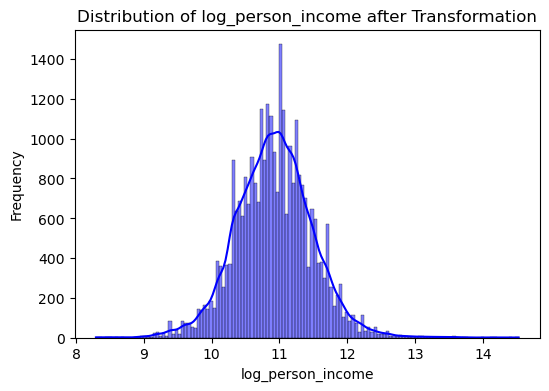

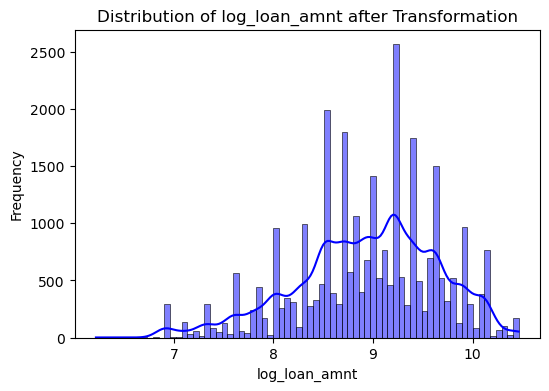

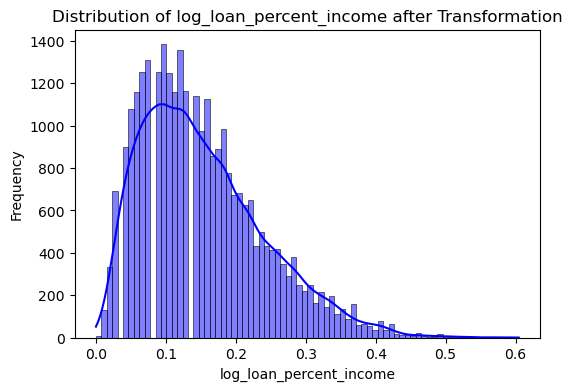

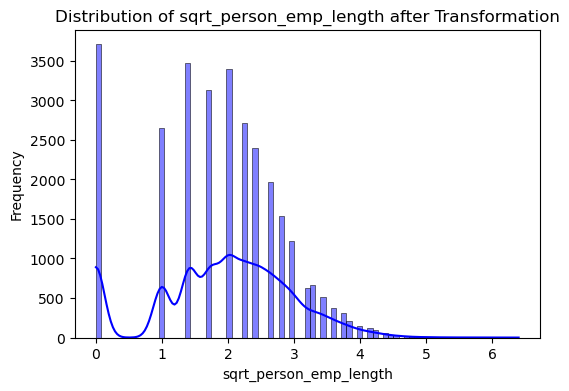

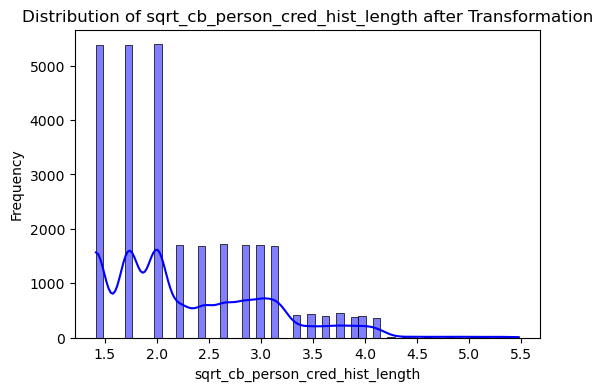

Skewness of the Transformed Features:
log_person_income                  0.137243
log_loan_amnt                     -0.450331
log_loan_percent_income            0.822351
sqrt_person_emp_length            -0.221226
sqrt_cb_person_cred_hist_length    0.893832
dtype: float64


In [18]:

# log transformation
df['log_person_income'] = np.log1p(df['person_income'])
df['log_loan_amnt'] = np.log1p(df['loan_amnt'])
df['log_loan_percent_income'] = np.log1p(df['loan_percent_income'])

#square root transformation
df['sqrt_person_emp_length'] = np.sqrt(df['person_emp_length'])
df['sqrt_cb_person_cred_hist_length'] = np.sqrt(df['cb_person_cred_hist_length'])


transformed_columns = ['log_person_income', 'log_loan_amnt', 'log_loan_percent_income', 'sqrt_person_emp_length', 'sqrt_cb_person_cred_hist_length']

for col in transformed_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Distribution of {col} after Transformation')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    
transformed_skewness = df[transformed_columns].skew()
print("Skewness of the Transformed Features:")
print(transformed_skewness)

The loan_perfect_income and cb_person_cred_hist_length have been reduced slightly, there are advanced methods that would futher reduce the skewness but we will continue with the transformations that we have. 

## Interaction Features
We will now be looking into creating new features but first, why?

### 1. Enhance Predictive Power:

    Interaction features combine existing variables into more meaningful metrics.
    They allow the model to capture relationships that are not obvious when features are analyzed individually.

### 2. Reflect Real-World Scenarios:

    Lenders consider ratios like debt-to-income when assessing creditworthiness.
    Including this features aligns the model with real-world financial risk assessment.

### 3. Simplify Model Learning:

    Instead of making the model infer these relationships (e.g., dividing loan amount by income internally), we explicitly provide these metrics. This reduces the complexity of the relationships the model has to learn.

In [20]:
# Debt-to-Income Ratio
df['debt_to_income'] = df['loan_amnt'] / df['person_income']




In [24]:
print(df.head())

   person_income  person_emp_length  loan_amnt  loan_int_rate  loan_status  \
0           9600                5.0       1000          11.14            0   
1           9600                1.0       5500          12.87            1   
2          65500                4.0      35000          15.23            1   
3          54400                8.0      35000          14.27            1   
4           9900                2.0       2500           7.14            1   

   loan_percent_income  cb_person_cred_hist_length  loan_intent_EDUCATION  \
0                 0.10                           2                   True   
1                 0.57                           3                  False   
2                 0.53                           2                  False   
3                 0.55                           4                  False   
4                 0.25                           2                  False   

   loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  ...  \
0       

## Binning

Is it needed? So Binning converts continuous numerical features into discrete categories or ranges. For example, categorizing loan_percent_income into low, medium, and high ranges might better capture risk levels. In our case Gradient boosting may not need binning, it maybe helpful for Logistic regression and we could consider binning loan_percent_income and debt_to_income into categories. 

We will hold off on Binning and see how well our second model works with the transformations and the new feature. 


### Scaling 

Because we are working with Logistic Regression Scaling is important for optimal performance

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_columns = ['log_person_income', 'log_loan_amnt', 'loan_int_rate']
df[['scaled_income', 'scaled_loan_amnt', 'scaled_int_rate']] = scaler.fit_transform(df[scaled_columns])

print(df.head())

   person_income  person_emp_length  loan_amnt  loan_int_rate  loan_status  \
0           9600                5.0       1000          11.14            0   
1           9600                1.0       5500          12.87            1   
2          65500                4.0      35000          15.23            1   
3          54400                8.0      35000          14.27            1   
4           9900                2.0       2500           7.14            1   

   loan_percent_income  cb_person_cred_hist_length  loan_intent_EDUCATION  \
0                 0.10                           2                   True   
1                 0.57                           3                  False   
2                 0.53                           2                  False   
3                 0.55                           4                  False   
4                 0.25                           2                  False   

   loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  ...  \
0       

## Final Review 

We can see that there are redundant features in our dataset so there are a few final changes we will make so it doesn't impact our second model. 

- We will keep Transformed Features like log_*, sqrt_*, scaled_*, and debt_to_income.
- Drop raw features like person_income, loan_amnt, loan_percent_income, etc.
- Review encoded features like loan_intent_* and loan_grade_* to avoid overfitting due to high dimensionality.

### *Approach*

1. Perform Correlation Analysis to identify which features have the strongest relationships with the target variable (loan_status) and which features are redundant.

2. Evaluate Feature Importance, not all features contribute equally to model performance. Feature importance helps identify which variables are most predictive.

3. Prepare the Final Feature Set by removing redundant or irrelevant features and keeping only meaningful ones.

#### Correlation Analysis

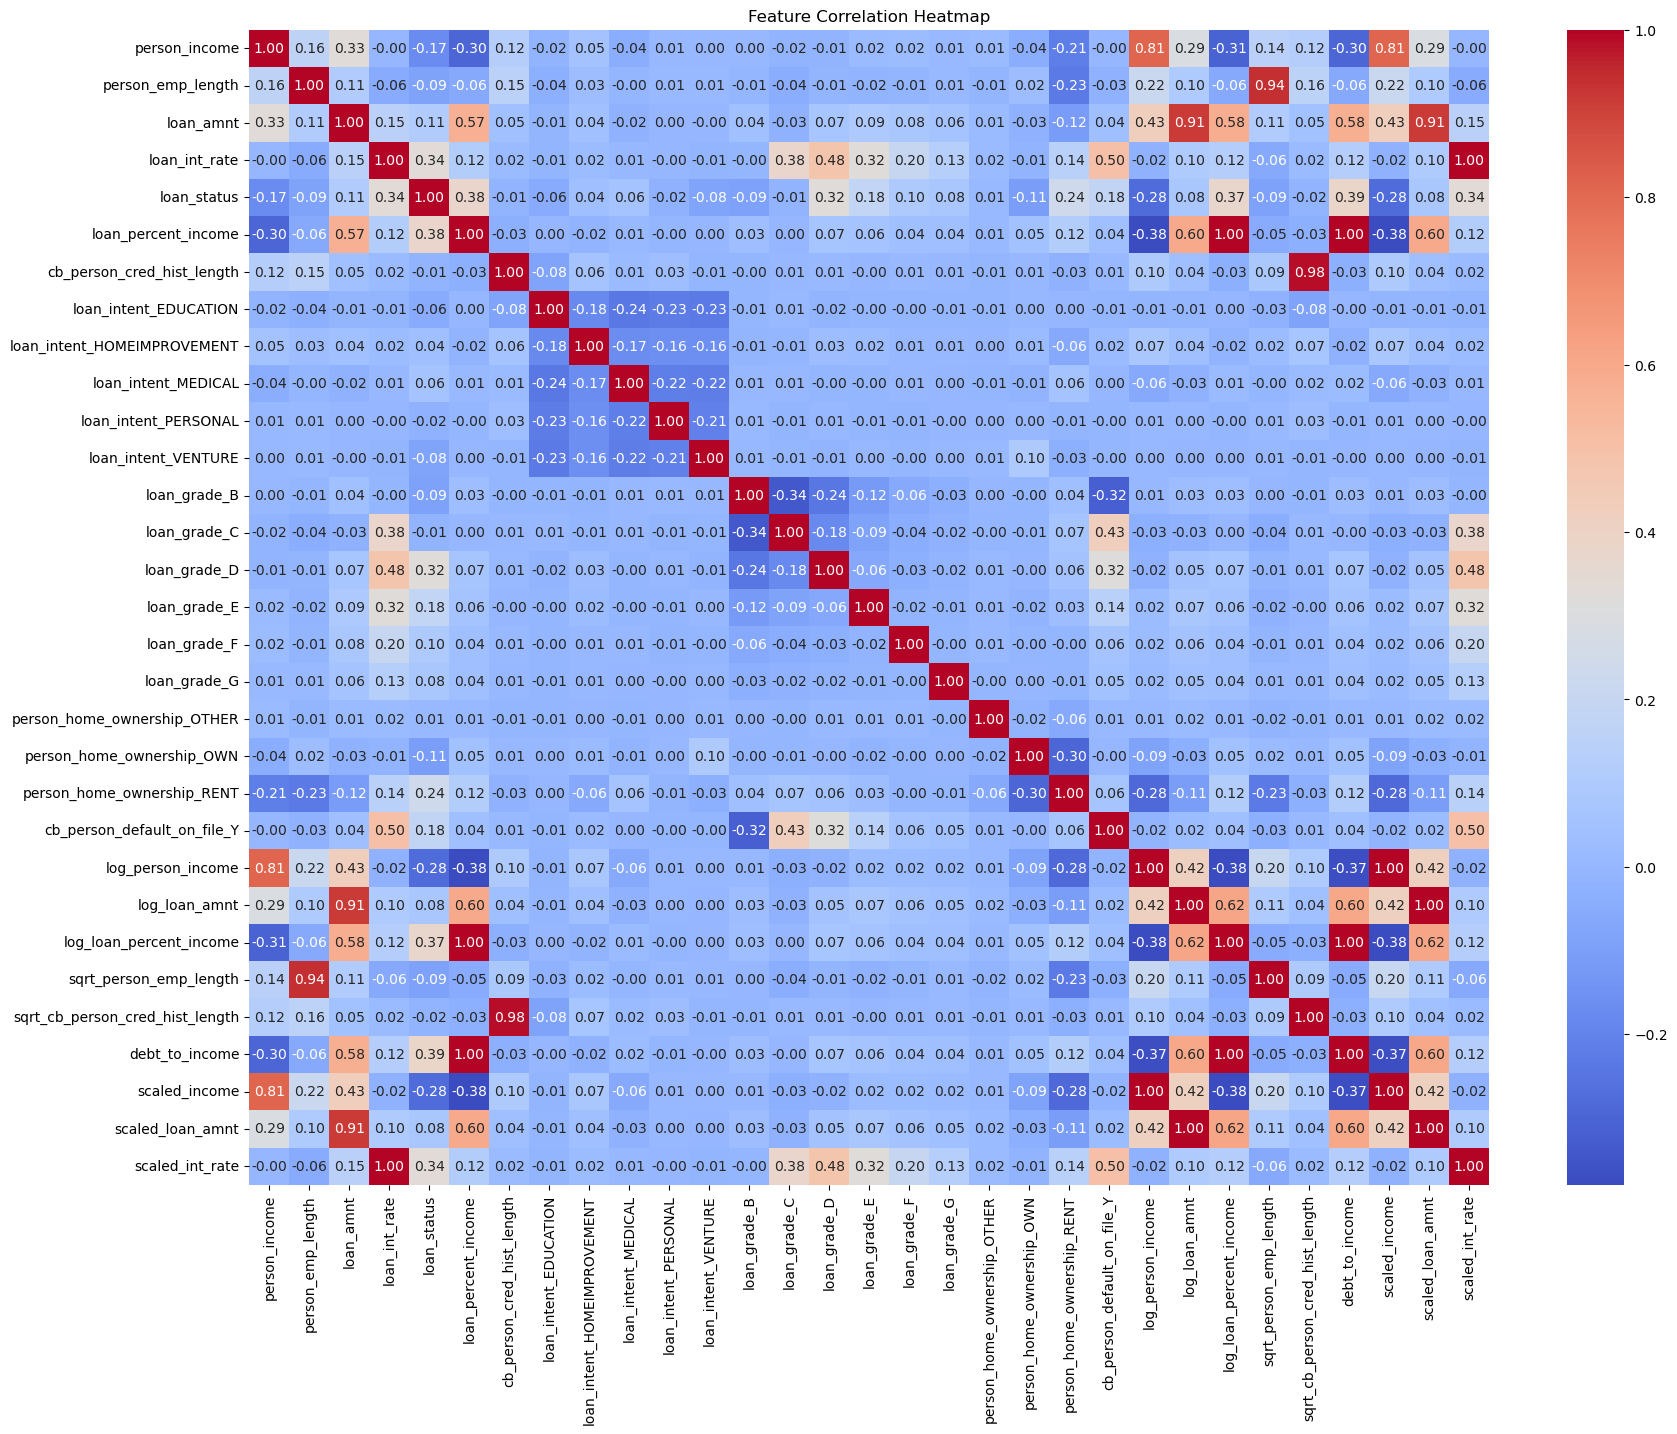

In [31]:
corr_matrix = df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

### Key Takeaways from the Heatmap Analysis

#### Highly Correlated Features:
- person_income vs log_person_income: Drop person_income and keep log_person_income since log transformation reduces skewness and makes the feature more interpretable.
- loan_percent_income vs log_loan_percent_income: Drop loan_percent_income for the same reason.

#### Low Correlation with Target (loan_status):
- Retain features like scaled_income and loan_percent_income (or its transformed version) as they show reasonable correlation with loan_status.
- Drop features with little to no correlation with loan_status.

#### Redundant Features:
- Loan Grades (loan_grade_A to loan_grade_F): These are one-hot encoded. We will keep these. 
- Home Ownership (person_home_ownership_RENT, OWN, OTHER): We may consider retaining the most meaningful feature or consider combining into one categorical variable, but for now we will keep it as is. 

#### Transformed Features:
- We will keep transformed features like log_*, sqrt_*, and scaled_* 







**with that being said, we will drop: Person_income and keep the log_person_income, drop loan_percent_income and keep the log. 

### Evaluate Feature Importance

To perform feature importance analysis we will be using Gradient Boosting and using feature_importances_ method. This will help identify which features contribute most to predicting loan_status.

Top Features by Importance:
                            Feature  Importance
26                   debt_to_income    0.330324
19       person_home_ownership_RENT    0.163440
3                     loan_int_rate    0.114613
29                  scaled_int_rate    0.088166
0                     person_income    0.055923
13                     loan_grade_D    0.049350
27                    scaled_income    0.033385
21                log_person_income    0.032831
12                     loan_grade_C    0.027414
18        person_home_ownership_OWN    0.022871
7       loan_intent_HOMEIMPROVEMENT    0.012305
24           sqrt_person_emp_length    0.010418
1                 person_emp_length    0.009983
8               loan_intent_MEDICAL    0.009931
10              loan_intent_VENTURE    0.008170
6             loan_intent_EDUCATION    0.007609
16                     loan_grade_G    0.004528
9              loan_intent_PERSONAL    0.004511
4               loan_percent_income    0.004274
14          

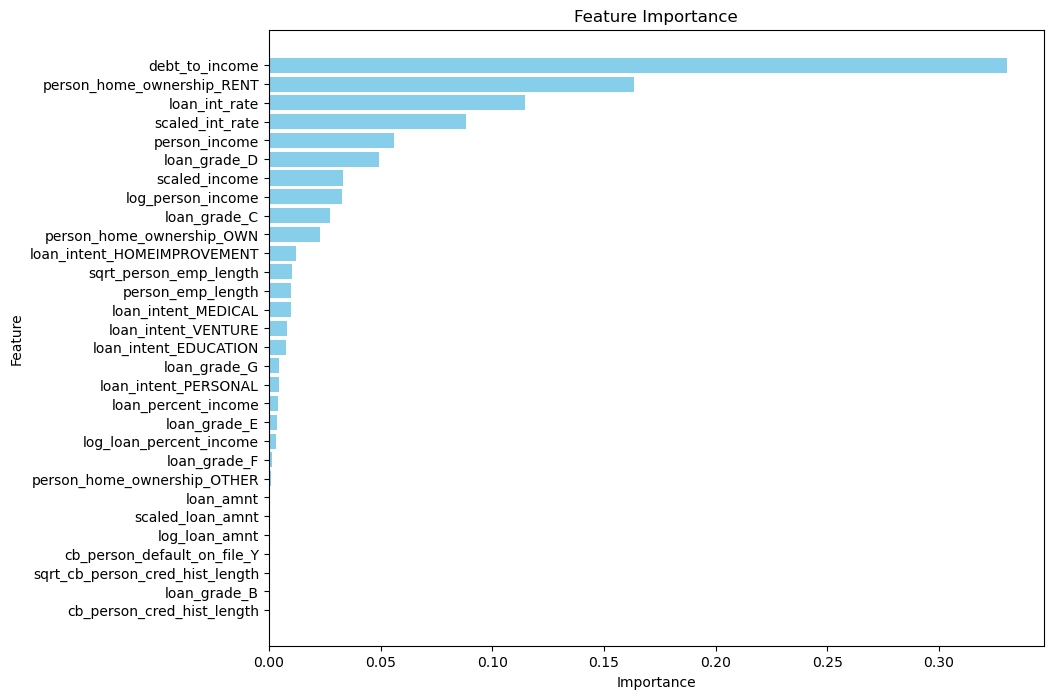

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

X = df.drop(columns=['loan_status']) 
y = df['loan_status']                


model = GradientBoostingClassifier(random_state=42)
model.fit(X, y)

# Feature importances
importance = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance}).sort_values(by='Importance', ascending=False)


print("Top Features by Importance:")
print(feature_importance)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis() 
plt.show()

We can see that the following features have very Low or Zero Importance
- cb_person_cred_hist_length: No predictive value.
- loan_grade_B and sqrt_cb_person_cred_hist_length: Zero importance.
- Near Zero Importance: loan_amnt, scaled_loan_amnt, and log_loan_amnt: Redundant features with minimal impact. cb_person_default_on_file_Y: Almost no contribution.

**Let's do a quick feature importance check on Logistic Regression as well**

Top Features by Logistic Regression Coefficients:
                            Feature   Coefficient  Abs_Coefficient
2                         loan_amnt  1.069929e-04     1.069929e-04
0                     person_income -4.056176e-05     4.056176e-05
3                     loan_int_rate  9.611024e-08     9.611024e-08
29                  scaled_int_rate  3.705390e-08     3.705390e-08
21                log_person_income -2.595606e-08     2.595606e-08
1                 person_emp_length -2.554686e-08     2.554686e-08
28                 scaled_loan_amnt  1.670471e-08     1.670471e-08
13                     loan_grade_D  1.111182e-08     1.111182e-08
24           sqrt_person_emp_length -9.397283e-09     9.397283e-09
5        cb_person_cred_hist_length -8.736804e-09     8.736804e-09
19       person_home_ownership_RENT  8.435200e-09     8.435200e-09
22                    log_loan_amnt -7.560131e-09     7.560131e-09
20      cb_person_default_on_file_Y  7.242977e-09     7.242977e-09
11          

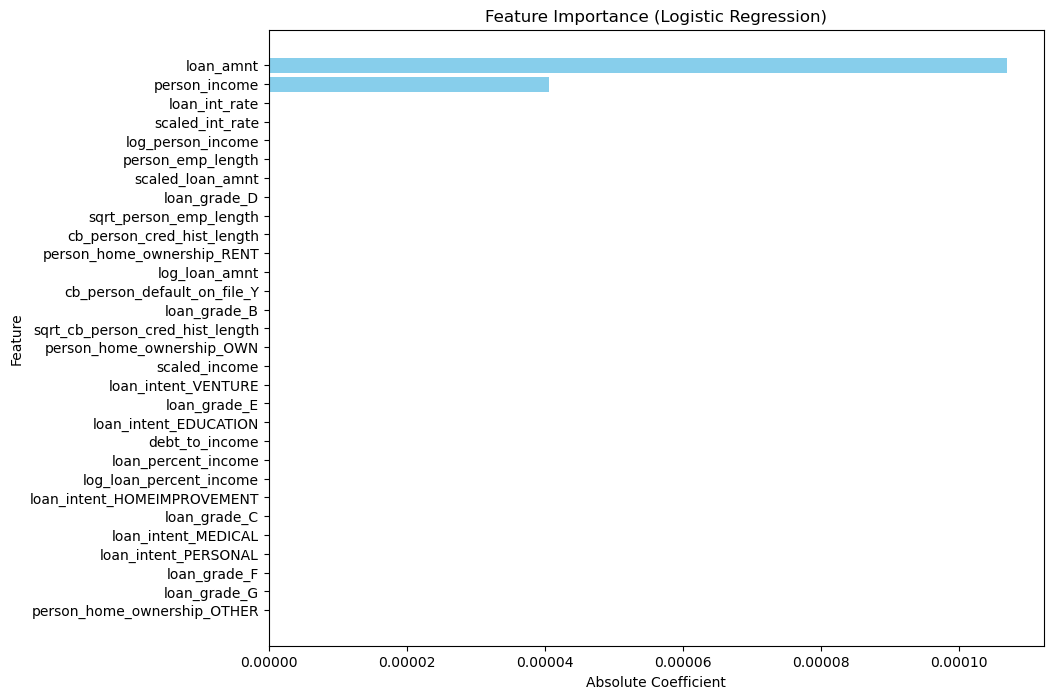

In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X, y)

coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient']) 
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print("Top Features by Logistic Regression Coefficients:")
print(feature_importance)


plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Abs_Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance (Logistic Regression)')
plt.gca().invert_yaxis() 
plt.show()

In [36]:
print(df.head())

   person_income  person_emp_length  loan_amnt  loan_int_rate  loan_status  \
0           9600                5.0       1000          11.14            0   
1           9600                1.0       5500          12.87            1   
2          65500                4.0      35000          15.23            1   
3          54400                8.0      35000          14.27            1   
4           9900                2.0       2500           7.14            1   

   loan_percent_income  cb_person_cred_hist_length  loan_intent_EDUCATION  \
0                 0.10                           2                   True   
1                 0.57                           3                  False   
2                 0.53                           2                  False   
3                 0.55                           4                  False   
4                 0.25                           2                  False   

   loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  ...  \
0       

## Clean the dataset 
Based on the feature importance results from both Gradient Boosting and Logistic Regression we will:

#### DROP
- person_income: Makes sense to drop, as log_person_income and scaled_income capture the same information while addressing skewness and scaling issues.

- loan_amnt:
Similar to person_income, this is redundant since log_loan_amnt and scaled_loan_amnt are retained.

- loan_percent_income:Dropping this is fine if log_loan_percent_income (a transformed version) is kept.

- sqrt_cb_person_cred_hist_length: Logical to drop, as this transformation doesn’t add much value based on the feature importance results.

- person_emp_length:
Reasonable to drop, as sqrt_person_emp_length is a better representation.

- loan_int_rate:
Makes sense to drop because scaled_int_rate captures the same information in a form suitable for Logistic Regression.


#### KEEP
- Transformed and Scaled Features:
Retaining both log_ and scaled_ versions in separate datasets ensures flexibility for Logistic Regression and Gradient Boosting.

- Categorical Features:
Keeping categorical features like loan_intent_* and loan_grade_* is logical, as they provide non-linear relationships that Gradient Boosting can capture effectively.

- Interaction Features:
Retaining debt_to_income is important because it reflects a critical real-world relationship.


#### Saving 2 different datasets. 
Because in our datasets the log_person_income and scaled_income coexist, we will be exporting 2 different datasets, Log for Gradient Boosting and Scaled for Logistical Regression. We need to avoid training models with both simultaneously.

In [40]:
df = df.drop(columns=[
    'person_income',               
    'loan_amnt',                    
    'log_loan_percent_income',      
    'sqrt_cb_person_cred_hist_length', 
    'person_emp_length',           
    'loan_int_rate'                
])

In [43]:
df.columns


Index(['loan_status', 'loan_percent_income', 'cb_person_cred_hist_length',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'cb_person_default_on_file_Y', 'log_person_income', 'log_loan_amnt',
       'sqrt_person_emp_length', 'debt_to_income', 'scaled_income',
       'scaled_loan_amnt', 'scaled_int_rate'],
      dtype='object')

## Save Two Separate Datasets:

#### One with log_* features for Gradient Boosting.
#### One with scaled_* features for Logistic Regression.

In [48]:

gradient_features_df = df.drop(columns=['scaled_income', 'scaled_loan_amnt'])
gradient_features_df.to_csv('../data/gradient_features_dataset.csv', index=False)

logistic_features_df = df.drop(columns=['log_person_income', 'log_loan_amnt'])
logistic_features_df.to_csv('../data/logistic_dataset.csv', index=False)

print("Two datasets created")

Two datasets created


In [46]:
logistic_features_df.head()

,loan_status,loan_percent_income,cb_person_cred_hist_length,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,...,loan_grade_G,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,cb_person_default_on_file_Y,sqrt_person_emp_length,debt_to_income,scaled_income,scaled_loan_amnt,scaled_int_rate
0,0,0.10,2,True,False,False,False,False,True,False,...,False,False,True,False,False,2.236068,0.104167,-3.109339,-2.853775,0.039646
1,1,0.57,3,False,False,True,False,False,False,True,...,False,False,False,False,False,1.000000,0.572917,-3.109339,-0.460835,0.573524
2,1,0.53,2,False,False,True,False,False,False,True,...,False,False,False,True,False,2.000000,0.534351,0.292144,2.137867,1.301820
3,1,0.55,4,False,False,True,False,False,False,True,...,False,False,False,True,True,2.828427,0.643382,-0.036779,2.137867,1.005564
4,1,0.25,2,False,False,False,False,True,False,False,...,False,False,True,False,False,1.414214,0.252525,-3.054835,-1.567811,-1.194753


In [47]:
gradient_features_df.head()

,loan_status,loan_percent_income,cb_person_cred_hist_length,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,...,loan_grade_G,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,cb_person_default_on_file_Y,log_person_income,log_loan_amnt,sqrt_person_emp_length,debt_to_income,scaled_int_rate
0,0,0.10,2,True,False,False,False,False,True,False,...,False,False,True,False,False,9.169623,6.908755,2.236068,0.104167,0.039646
1,1,0.57,3,False,False,True,False,False,False,True,...,False,False,False,False,False,9.169623,8.612685,1.000000,0.572917,0.573524
2,1,0.53,2,False,False,True,False,False,False,True,...,False,False,False,True,False,11.089821,10.463132,2.000000,0.534351,1.301820
3,1,0.55,4,False,False,True,False,False,False,True,...,False,False,False,True,True,10.904138,10.463132,2.828427,0.643382,1.005564
4,1,0.25,2,False,False,False,False,True,False,False,...,False,False,True,False,False,9.200391,7.824446,1.414214,0.252525,-1.194753


### Now that we have completed the feature engineering, dropped redundant and unnecessary features, and saved 2 separate datasets (one for Logistic Regression and One for Gradient Boosting), we will revisit the modeling stage under the notebook model 2
